<a href="https://colab.research.google.com/github/nadhybrandao/Atividades_Praticas_WoMarkersCode/blob/main/(Grupo)_WoMakersCode_Testes_de_Hip%C3%B3teses.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Challenge Testes de Hipóteses
Squad katherine Johnson

**Integrantes:**

Ayla Carolina Silva Machado

Dayna Lilian Figueiredo

Fernanda Soares Lima

Gabriela Pontes Crespo

Maria Elisa Scovino da Silva

Nadia Bertoldo Germano dos Santos

Nathália Macedo

#Desafio 1: Cosméticos

Suponha que você trabalha em uma empresa do ramo de cosméticos ou beleza. O
Time de produtos dessa empresa está interessado criar novos batons com maior
durabilidade. Para isso estão testando 3 diferentes fórmulas para irem a mercado.

Com isso, a empresa fez uma pesquisa com varias voluntárias e populou a base de
dados (desafio_01_cosmeticos.csv) contendo as seguintes informacoes:

● id_produto: código identificador do produto, com a fórmula utilizada. Para
diferenciarmos se se trata do batom com a fórmula 1, 2 ou 3

● id_voluntária: código identificador da voluntária que utilizou o produto.

● durabilidade: quanto tempo o produto durou em horas.

● idade: idade da voluntária

● exposicao_sol: variável que indica 1 se a voluntária se expos ao sol 0 caso
contrário.

De posse dessas informacoes, o time de produtos solicitou aos analistas de dados da empresa as seguintes perguntas a serem respondidas:

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
import scipy as scipy

In [ ]:
df_cosmeticos = pd.read_csv('desafio_01_cosmeticos.csv')

In [ ]:
df_cosmeticos.head()

,id_produto,id_voluntária,durabilidade,idade,exposicao_sol
0,1,1,12,40,1
1,2,2,5,36,0
2,1,3,19,47,0
3,1,4,14,36,1
4,1,5,17,46,1


In [ ]:
df_cosmeticos.describe()

,id_produto,id_voluntária,durabilidade,idade,exposicao_sol
count,300.000000,300.000000,300.000000,300.000000,300.000000
mean,2.000000,150.500000,17.133333,36.886667,0.440000
std,0.817861,86.746758,10.942945,12.625841,0.497216
min,1.000000,1.000000,5.000000,18.000000,0.000000
25%,1.000000,75.750000,9.000000,26.000000,0.000000
50%,2.000000,150.500000,14.000000,36.000000,0.000000
75%,3.000000,225.250000,20.000000,48.000000,1.000000
max,3.000000,300.000000,48.000000,60.000000,1.000000


In [ ]:
df_cosmeticos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   id_produto     300 non-null    int64
 1   id_voluntária  300 non-null    int64
 2   durabilidade   300 non-null    int64
 3   idade          300 non-null    int64
 4   exposicao_sol  300 non-null    int64
dtypes: int64(5)
memory usage: 11.8 KB


##Questão 1
Existe diferenca estatisticamente significativa na durabilidade dos batons com formulas diferentes?



In [ ]:
#Vou utilizar o teste de Shapiro-Wilk para verificar a normalidade dos dados:
# Retornando os Ids de cada tipo(fórmula) de batom
batons_id = df_cosmeticos['id_produto'].unique()
batons_id

array([1, 2, 3])

In [ ]:
# Coletar as amostras de durabilidade para cada tipo(fórmula) de batom
durabilidade_1 = df_cosmeticos[df_cosmeticos['id_produto'] == 1]['durabilidade']
durabilidade_2 = df_cosmeticos[df_cosmeticos['id_produto'] == 2]['durabilidade']
durabilidade_3 = df_cosmeticos[df_cosmeticos['id_produto'] == 3]['durabilidade']

durabilidade_1, durabilidade_2, durabilidade_3

(0      12
 2      19
 3      14
 4      17
 5      14
        ..
 195    11
 196    14
 197    10
 198    14
 199    15
 Name: durabilidade, Length: 100, dtype: int64,
 1       5
 9       7
 13      5
 14      9
 15      7
        ..
 245     6
 246    11
 247     9
 248     7
 249     9
 Name: durabilidade, Length: 100, dtype: int64,
 10     31
 11     28
 12     38
 19     26
 23     30
        ..
 295    18
 296    30
 297    43
 298    41
 299    25
 Name: durabilidade, Length: 100, dtype: int64)

In [ ]:
#Hipóteses do teste de Shapiro-Wilk:

#Hipótese Nula (H0): Os dados seguem uma distribuição normal. (H0 é o que tem =)
#Hipótese Alternativa (H1): Os dados não seguem uma distribuição normal.

# Realizar o teste de Shapiro-Wilk para durabilidade_1
shapiro_result_d1 = stats.shapiro(durabilidade_1)
shapiro_result_d1

ShapiroResult(statistic=0.9121360340468334, pvalue=5.514552602529885e-06)

In [ ]:
# Realizar o teste de Shapiro-Wilk para durabilidade_2
shapiro_result_d2 = stats.shapiro(durabilidade_2)
shapiro_result_d2

ShapiroResult(statistic=0.9233558250920623, pvalue=2.130231608850198e-05)

In [ ]:
# Realizar o teste de Shapiro-Wilk para durabilidade_3
shapiro_result_d3 = stats.shapiro(durabilidade_3)
shapiro_result_d3

ShapiroResult(statistic=0.9472153860995577, pvalue=0.0005462962631409984)

In [ ]:
# Interpretar os resultados do teste de Shapiro-Wilk para durabilidade_1
# pvalue=5.514552602529885e-06 =  5.514552602529885X 10^-6 = 0.000005514552602529885

alpha = 0.05

if shapiro_result_d1.pvalue < alpha:
    print(f"Os dados não seguem uma distribuição normal (p-valor < {alpha}).") #H1 (rejeição de H0)
else:
    print(f": Os dados seguem uma distribuição normal (p-valor >= {alpha}).") #H0

Os dados não seguem uma distribuição normal (p-valor < 0.05).


In [ ]:
# Interpretar os resultados do teste de Shapiro-Wilk para durabilidade_2
#pvalue=2.130231608850198e-05 = 2.130231608850198×10^-5 = 0.00002130231608850198
alpha = 0.05

if shapiro_result_d2.pvalue < alpha:
    print(f"Os dados não seguem uma distribuição normal (p-valor < {alpha}).") #H1 (rejeição de H0)
else:
    print(f": Os dados seguem uma distribuição normal (p-valor >= {alpha}).") #H0

Os dados não seguem uma distribuição normal (p-valor < 0.05).


In [ ]:
# Interpretar os resultados do teste de Shapiro-Wilk para durabilidade_3
#pvalue=0.0005462962631409984
alpha = 0.05 #Se o p-valor < α (alpha): A hipótese nula (H0) é rejeitada

if shapiro_result_d3.pvalue < alpha:
    print(f"Os dados não seguem uma distribuição normal (p-valor < {alpha}).") #H1 (rejeição de H0)
else:
    print(f"Os dados seguem uma distribuição normal (p-valor >= {alpha}).") #H0

Os dados não seguem uma distribuição normal (p-valor < 0.05).


In [ ]:
#Para verificar se há uma diferença estatisticamente significativa na durabilidade dos batons
#será usado o teste Kruskal-Wallis

#Hipótese Nula (H0): Não há diferença estatisticamente significativa na durabilidade dos produtos entre os diferentes id_produto.
#Hipótese Alternativa (H1): Há uma diferença estatisticamente significativa na durabilidade dos produtos entre os diferentes id_produto.


# Realizar o teste de Kruskal-Wallis
kruskal_result = stats.kruskal(durabilidade_1, durabilidade_2, durabilidade_3)
kruskal_result

KruskalResult(statistic=227.46096368302588, pvalue=4.050226510971091e-50)

In [ ]:
# Interpretar o resultado do teste de Kruskal-Wallis
#pvalue=4.050226510971091e-50 = 4.050226510971091×10^-50
alpha = 0.05
if kruskal_result.pvalue < alpha:
    print("Há uma diferença estatisticamente significativa na durabilidade dos produtos entre os diferentes id_produto.") #H1
else:
    print("Não há diferença estatisticamente significativa na durabilidade dos produtos entre os diferentes id_produto.")  #H0


Há uma diferença estatisticamente significativa na durabilidade dos produtos entre os diferentes id_produto.


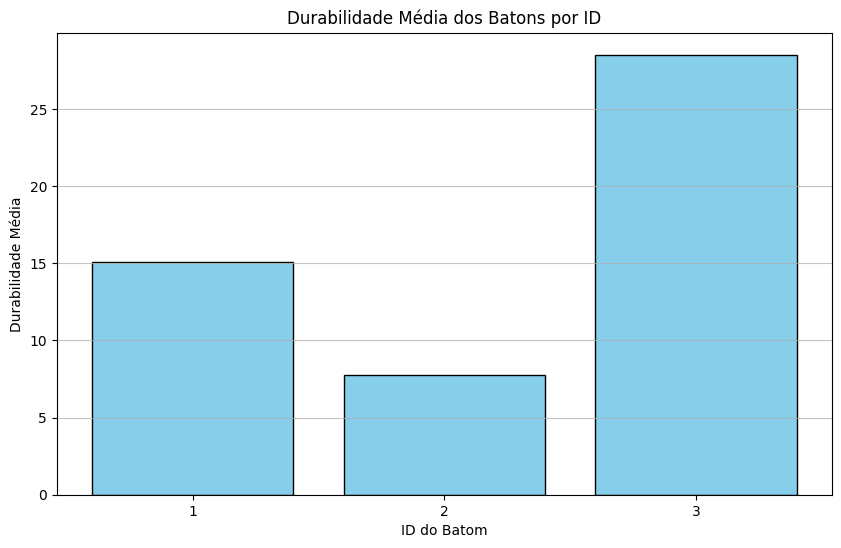

In [ ]:
# Calcular a durabilidade média por id_produto
durabilidade_media = df_cosmeticos.groupby('id_produto')['durabilidade'].mean().reset_index()

# Plotar o gráfico de barras
plt.figure(figsize=(10, 6))
plt.bar(durabilidade_media['id_produto'], durabilidade_media['durabilidade'], color='skyblue', edgecolor='black')
plt.title('Durabilidade Média dos Batons por ID')
plt.xlabel('ID do Batom')
plt.ylabel('Durabilidade Média')
plt.xticks(durabilidade_media['id_produto'])  # Para garantir que todos os IDs sejam mostrados
plt.grid(axis='y', alpha=0.75)
plt.show()

<ipython-input-20-2ea8cf02a561>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='id_produto', y='durabilidade', data=df_cosmeticos, palette='pastel')
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tupl

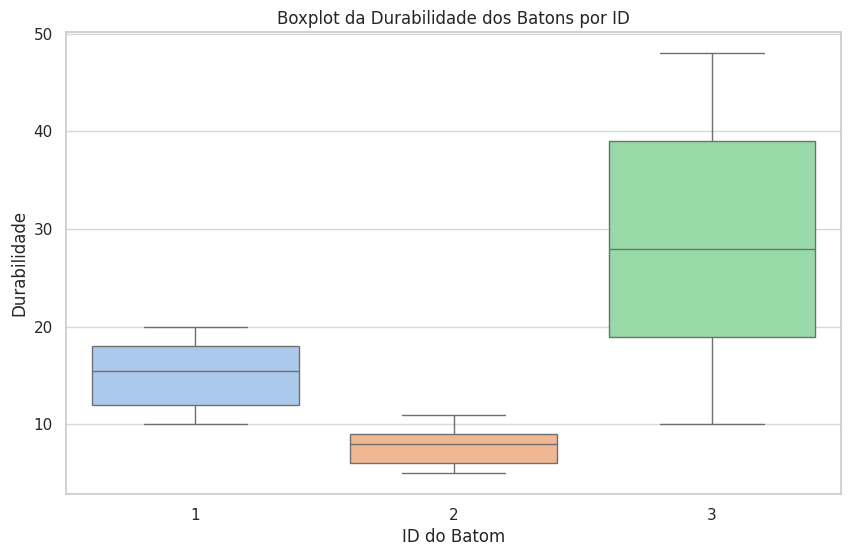

In [ ]:
# Configurar o estilo
sns.set(style="whitegrid")

# Criar o boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(x='id_produto', y='durabilidade', data=df_cosmeticos, palette='pastel')
plt.title('Boxplot da Durabilidade dos Batons por ID')
plt.xlabel('ID do Batom')
plt.ylabel('Durabilidade')
plt.grid(axis='y', alpha=0.75)
plt.show()

##Questão 2
Essa diferença persiste ou não quando a voluntária se expõe ao sol? E com relação a idade?


In [ ]:
# Separar os dados por fórmula
formula1 = df_cosmeticos[df_cosmeticos['id_produto'] == 1]
formula2 = df_cosmeticos[df_cosmeticos['id_produto'] == 2]
formula3 = df_cosmeticos[df_cosmeticos['id_produto'] == 3]

# Variável para verificar exposição ao sol
formula1_sol = formula1['exposicao_sol']
formula2_sol = formula2['exposicao_sol']
formula3_sol = formula3['exposicao_sol']

# Aplicar o teste ANOVA (f_oneway) para voluntárias expostas ao sol (exposicao_sol == 1)
F, p = stats.f_oneway(formula1[formula1_sol == 1]['durabilidade'],
                      formula2[formula2_sol == 1]['durabilidade'],
                      formula3[formula3_sol == 1]['durabilidade'])

# Exibir os resultados
print(f"Estatística F: {F}")
print(f"Valor p: {p}")

# Definir nível de significância
alpha_anova = 0.05

if p < alpha_anova:
    print("A diferença de durabilidade persiste mesmo quando expostas ao sol.")
else:
    print("A diferença de durabilidade não persiste quando expostas ao sol.")


Estatística F: 74.10157481249969
Valor p: 3.737274200111132e-22
A diferença de durabilidade persiste mesmo quando expostas ao sol.


In [ ]:
# Calcular a média de durabilidade e idade por id_produto e exposição ao sol
media_durabilidade_idade = df_cosmeticos.groupby(['id_produto', 'exposicao_sol'])[['durabilidade', 'idade']].mean()

# Exibir o resultado
print(media_durabilidade_idade)


                          durabilidade      idade
id_produto exposicao_sol                         
1          0                 17.727273  39.800000
           1                 11.911111  36.511111
2          0                  7.961538  40.461538
           1                  7.562500  37.375000
3          0                 33.901639  26.131148
           1                 20.102564  44.666667


In [ ]:
# Definir faixas etárias
df_cosmeticos['faixa_etaria'] = pd.cut(df_cosmeticos['idade'], bins=[18, 30, 40, 50, 60], labels=['18-30', '31-40', '41-50', '51-60'])


In [ ]:
# Filtrar as amostras de durabilidade para cada fórmula
formula_1_idade = df_cosmeticos[df_cosmeticos['id_produto'] == 1]['durabilidade']
formula_2_idade = df_cosmeticos[df_cosmeticos['id_produto'] == 2]['durabilidade']
formula_3_idade = df_cosmeticos[df_cosmeticos['id_produto'] == 3]['durabilidade']

# Aplicar o teste ANOVA para verificar se a diferença persiste com base na idade
estatistica_idade, p_valor_idade = stats.f_oneway(formula_1_idade, formula_2_idade, formula_3_idade)

# Exibir os resultados
print(f"F: {estatistica_idade:.2f}, p-valor: {p_valor_idade:.2e}")

# Verificar significância
if p_valor_idade < 0.05:
    print("Diferença significativa em relação à idade.")
else:
    print("Sem diferença significativa em relação à idade.")


F: 240.67, p-valor: 7.35e-63
Diferença significativa em relação à idade.


In [ ]:
# Calcular a média de durabilidade e idade por id_produto e faixa etária
media_durabilidade_idade_faixa = df_cosmeticos.groupby(['id_produto', 'faixa_etaria'])[['durabilidade', 'idade']].mean()

# Exibir o resultado
print(media_durabilidade_idade_faixa)


                         durabilidade      idade
id_produto faixa_etaria                         
1          18-30            14.636364  25.121212
           31-40            14.090909  35.363636
           41-50            15.740741  45.703704
           51-60            16.277778  55.055556
2          18-30             6.333333  24.333333
           31-40             6.058824  35.705882
           41-50             9.323529  45.558824
           51-60             9.166667  56.277778
3          18-30            35.948276  24.051724
           31-40            17.100000  37.600000
           41-50            18.411765  46.470588
           51-60            16.230769  56.846154


<ipython-input-25-53e8af654cf3>:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  media_durabilidade_idade_faixa = df_cosmeticos.groupby(['id_produto', 'faixa_etaria'])[['durabilidade', 'idade']].mean()


##Questão 3
Qual fórmula de batom você indicaria para consumidores que buscam maior
durabilidade e exposição ao sol?

Primeiro, para essa análise, iremos utilizar o teste ANOVA, uma vez que precisamos comparar a média de três grupos: os produtos tipo 1, 2 e 3. E com isso verificarmos se realmente há uma diferença significativa na durabilidade entre os produtos.

Determinando as hipóteses:


H0: **Não há diferença** significativa na durabilidade com base na exposição ao sol entre as fórmulas de batom.

H1: **Há uma diferença** significativa na durabilidade com base na exposição ao sol entre as fórmulas de batom.


Passamos para a aplicação do teste:

In [ ]:
#Como queremos temos interesse apenas em produtos que tiveram exposição ao sol, vamos realizar o filtro do DF:
df_cosmeticos_sol = df_cosmeticos[df_cosmeticos['exposicao_sol'] == 1]

#Realizando agrupamento dos produtos
df_cosmeticos_sol_1 = df_cosmeticos_sol[df_cosmeticos_sol['id_produto'] == 1]['durabilidade']
df_cosmeticos_sol_2 = df_cosmeticos_sol[df_cosmeticos_sol['id_produto'] == 2]['durabilidade']
df_cosmeticos_sol_3 = df_cosmeticos_sol[df_cosmeticos_sol['id_produto'] == 3]['durabilidade']

#Aplicando o teste ANOVA
estatistica_f, p_value = stats.f_oneway(df_cosmeticos_sol_1, df_cosmeticos_sol_2, df_cosmeticos_sol_3)

#Utilizando alpha com nível de significância de 5%
if p_value < 0.05:
    print('Rejeita H0: Há uma diferença significativa na durabilidade com base na exposição ao sol entre as fórmulas.')
else:
    print('Não rejeita H0: Não há diferença significativa na durabilidade com base na exposição ao sol entre as fórmulas.')

Rejeita H0: Há uma diferença significativa na durabilidade com base na exposição ao sol entre as fórmulas.


Através do teste, concluímos que realmente há uma diferença significativa entre a durabilidade dos produtos. Com isso, podemos comparar a média de cada um:

In [ ]:
media_durabilidade = df_cosmeticos_sol.groupby('id_produto')['durabilidade'].mean()
media_durabilidade

,durabilidade
id_produto,
1,11.911111
2,7.562500
3,20.102564


<ipython-input-28-fad8ecdc10b2>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=media_durabilidade.index, y=media_durabilidade.values, palette="flare")
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: 

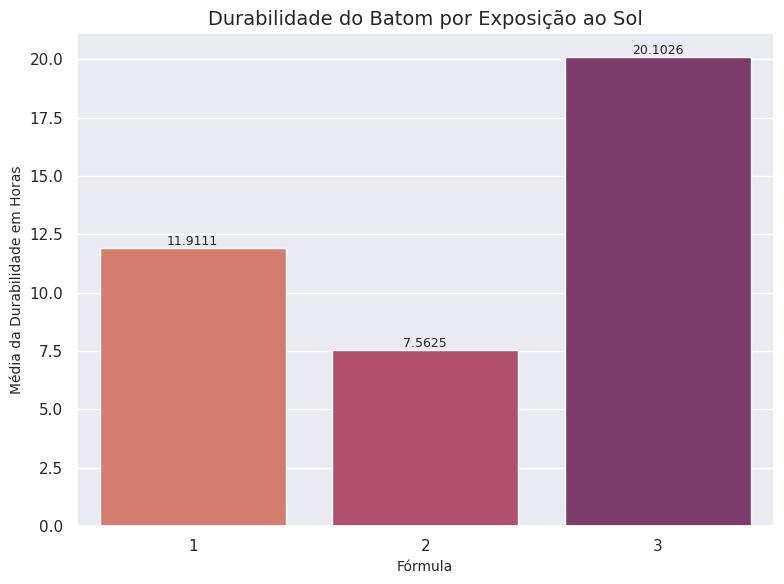

In [ ]:
#Plotando gráfico de barras dos produtos por durabilidade
sns.set(style="darkgrid")
plt.figure(figsize=(8, 6))

ax = sns.barplot(x=media_durabilidade.index, y=media_durabilidade.values, palette="flare")
plt.title("Durabilidade do Batom por Exposição ao Sol", fontsize=14)
plt.xlabel("Fórmula", fontsize=10)
plt.ylabel("Média da Durabilidade em Horas", fontsize=10)

ax.bar_label(ax.containers[0], fontsize=9)
ax.bar_label(ax.containers[1], fontsize=9)
ax.bar_label(ax.containers[2], fontsize=9)

plt.tight_layout()
plt.show()

Resposta: podemos concluir que o produto mais indicado para aqueles que buscam maior durabilidade com base na exposição ao sol, é **a fórmula do produto 3**.

# Desafio 2:

Imagine que você trabalha em uma empresa do setor alimentício, e o preço de determinado produto, um novo picolé, tem uma distribuição normal com média igual a R$7,85 e desvio padrão igual a R3,32. Suspeita-se que devido ao verão, em determinadas localidades de praia o preco do picolé esteja mais caro.

Para verificar se esse efeito é estatisticamente significativo, contactaram você, analista de dados.

Suponha que para realizar essa análise voce tenha dados de 45 lojas em cidades do litoral, escolhidas aleatoriamente. E constatou que o preço médio do picolé nessas cidades é de R$11,52.


In [ ]:
import scipy.stats as stats
import math
import numpy as np

m_populacional = 7.85
desvio_padrao = 3.32
m_amostral = 11.52
n = 45
nivel_significancia = 0.05


##Questão 1
Você pode concluir que existe diferença de preços estatisticamente
relevante com 5% de significância?

In [ ]:
#Cálculo do erro padrão da média
erro = m_populacional/np.sqrt(n)

#Cálculo da estatítica Z
z_score = (m_amostral - m_populacional) / erro

# Valor crítico de Z para teste unilateral
z_critical = stats.norm.ppf(1 - nivel_significancia)

#Resultados
print(f"Valor da estatística Z: {z_score:.2f}")
print(f"Valor crítico de Z: {z_critical:.2f}")



Valor da estatística Z: 3.14
Valor crítico de Z: 1.64


In [ ]:
if z_score > z_critical:
  print("Existe diferença estatisticamente relevante com 5% de significância")
else:
  print("Não existe diferença estatisticamente relevante com 5% de significância")

Existe diferença estatisticamente relevante com 5% de significância


##Questão 2
Qual o valor da variável teste, o intervalo de confianca e o p-valor?

In [ ]:
# Calcular a estatística de teste
z = (m_amostral - m_populacional) / (desvio_padrao / math.sqrt(n))

# Calcular o p-valor
p_valor = 1 - stats.norm.cdf(z)

# Calcular o intervalo de confiança
z_critico = stats.norm.ppf(1 - nivel_significancia / 2)
margem_erro = z_critico * (desvio_padrao / math.sqrt(n))
intervalo_confianca = (m_amostral - margem_erro, m_amostral + margem_erro)

print(f"Valor da estatística de teste (z): {z:.2f}")
print(f"p-valor: {p_valor:.4f}")
print(f"Intervalo de confiança: {intervalo_confianca[0]:.2f} a {intervalo_confianca[1]:.2f}")

Valor da estatística de teste (z): 7.42
p-valor: 0.0000
Intervalo de confiança: 10.55 a 12.49
